In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
# import the libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Dropout
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [5]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [6]:
train_path = 'C:\\Users\\saura\Downloads\\Compressed\\fabric\\Thesis\\train'
valid_path = "C:\\Users\\saura\\Downloads\\Compressed\\fabric\\Thesis\\valid"
test_path = 'C:\\Users\\saura\\Downloads\\Compressed\\fabric\\Thesis\\test'

In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
                                     rotation_range = 20, width_shift_range = 0.2, 
                                     height_shift_range = 0.1, shear_range = 0.1, 
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode = 'nearest')

In [8]:
train_batches_mn = datagen.flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size= 10)
valid_batches_mn = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory = valid_path, target_size=(224,224), batch_size= 10)
test_batches_mn = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size= 10, shuffle=False)

Found 318 images belonging to 2 classes.
Found 86 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [9]:
mobile = tf.keras.applications.mobilenet.MobileNet()
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [10]:
model_mn = tf.keras.Sequential()

In [11]:
for layer in mobile.layers[:-31]: #for first 6 layers
    model_mn.add(layer)

In [12]:
model_mn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                          
                                                                 
 conv_dw_1_relu (ReLU)       (None, 112, 112, 32)      0

 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
          

In [13]:
model_mn.add(tf.keras.layers.GlobalAveragePooling2D())
model_mn.add(Dropout(0.45))
model_mn.add(Dense(units= 2, activation='softmax'))

In [14]:
model_mn.summary()
print(len(model_mn.layers))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                          
                                                                 
 conv_dw_1_relu (ReLU)       (None, 112, 112, 32)      0

 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
          

In [15]:
model_mn.layers[35]

In [16]:
# train the last 23 layers(changable)

for layer in model_mn.layers[:-28]:
    layer.trainable = False

In [17]:
model_mn.compile(optimizer=Adam(learning_rate=0.00003), loss='CategoricalCrossentropy', metrics=['accuracy'])

In [18]:
r = model_mn.fit(x=train_batches_mn,
            steps_per_epoch= len(train_batches_mn),
            validation_data=valid_batches_mn,
            validation_steps=len(valid_batches_mn),
            epochs=100,
          verbose = 2)

Epoch 1/100
32/32 - 28s - loss: 1.4514 - accuracy: 0.4654 - val_loss: 0.9393 - val_accuracy: 0.5116 - 28s/epoch - 867ms/step
Epoch 2/100
32/32 - 15s - loss: 1.1280 - accuracy: 0.5377 - val_loss: 0.7646 - val_accuracy: 0.5581 - 15s/epoch - 454ms/step
Epoch 3/100
32/32 - 14s - loss: 0.9408 - accuracy: 0.5597 - val_loss: 0.6858 - val_accuracy: 0.5814 - 14s/epoch - 453ms/step
Epoch 4/100
32/32 - 15s - loss: 0.8627 - accuracy: 0.5786 - val_loss: 0.6502 - val_accuracy: 0.6279 - 15s/epoch - 468ms/step
Epoch 5/100
32/32 - 16s - loss: 0.8786 - accuracy: 0.5912 - val_loss: 0.6201 - val_accuracy: 0.6628 - 16s/epoch - 494ms/step
Epoch 6/100
32/32 - 16s - loss: 0.8112 - accuracy: 0.6289 - val_loss: 0.5965 - val_accuracy: 0.7442 - 16s/epoch - 493ms/step
Epoch 7/100
32/32 - 16s - loss: 0.8243 - accuracy: 0.6132 - val_loss: 0.5985 - val_accuracy: 0.7326 - 16s/epoch - 492ms/step
Epoch 8/100
32/32 - 16s - loss: 0.7596 - accuracy: 0.6635 - val_loss: 0.5982 - val_accuracy: 0.7326 - 16s/epoch - 492ms/step


32/32 - 17s - loss: 0.4293 - accuracy: 0.8270 - val_loss: 0.5766 - val_accuracy: 0.8488 - 17s/epoch - 524ms/step
Epoch 67/100
32/32 - 16s - loss: 0.3846 - accuracy: 0.8302 - val_loss: 0.5511 - val_accuracy: 0.8256 - 16s/epoch - 495ms/step
Epoch 68/100
32/32 - 16s - loss: 0.4425 - accuracy: 0.8019 - val_loss: 0.5508 - val_accuracy: 0.8256 - 16s/epoch - 513ms/step
Epoch 69/100
32/32 - 17s - loss: 0.3966 - accuracy: 0.8333 - val_loss: 0.5514 - val_accuracy: 0.8488 - 17s/epoch - 531ms/step
Epoch 70/100
32/32 - 16s - loss: 0.3658 - accuracy: 0.8585 - val_loss: 0.5409 - val_accuracy: 0.8256 - 16s/epoch - 505ms/step
Epoch 71/100
32/32 - 16s - loss: 0.3669 - accuracy: 0.8302 - val_loss: 0.5715 - val_accuracy: 0.8488 - 16s/epoch - 514ms/step
Epoch 72/100
32/32 - 16s - loss: 0.4354 - accuracy: 0.7987 - val_loss: 0.5775 - val_accuracy: 0.8605 - 16s/epoch - 505ms/step
Epoch 73/100
32/32 - 15s - loss: 0.3982 - accuracy: 0.8396 - val_loss: 0.6076 - val_accuracy: 0.8372 - 15s/epoch - 455ms/step
Epoch

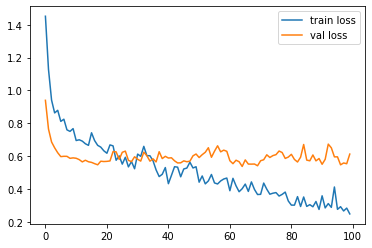

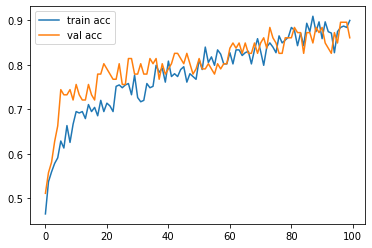

<Figure size 432x288 with 0 Axes>

In [19]:

import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

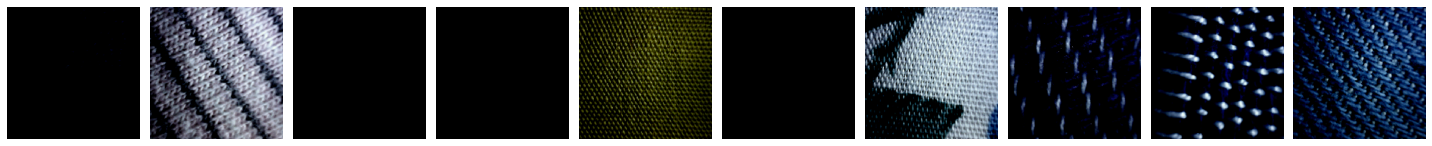

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [21]:
test_imgs, test_labels = next(test_batches_mn)
plotImages(test_imgs)
print(test_labels)

In [22]:
test_labels = test_batches_mn.classes

In [23]:
predictions = model_mn.predict(x=test_batches_mn, steps=len(test_batches_mn), verbose=0)

In [24]:
test_batches_mn.class_indices

{'0': 0, '1': 1}

In [25]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[19  2]
 [ 4 17]]


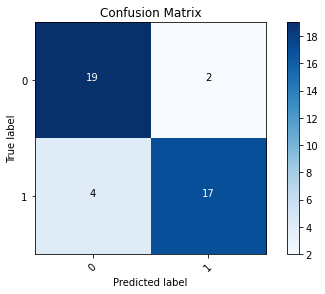

In [27]:
cm_plot_labels = ['0','1']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')